In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [143]:
#Cargas las hojas del excel
hojas = pd.read_excel(r"C:\Users\santi\OneDrive\Desktop\Python\Comedores populares.xlsx", sheet_name=None)

In [148]:
columnas = ["Departamento", "Provincia", "Distrito", "Nombre_Comedor"]

#Limpieza y renombrado
for nombre, hoja in hojas.items():
    hoja.columns = columnas_estandar
    hoja = hoja.dropna(subset=["Departamento", "Provincia", "Distrito", "Nombre_Comedor"])
    hojas[nombre] = hoja

#Unir todas las hojas
df_total = pd.concat(hojas.values(), ignore_index=True)

#Limpiar filas que solo tienen letras sueltas
df_total = df_total[df_total["Departamento"].str.len() > 2]

#Quitamos las antiguas etiquetas
df_total.drop((0), inplace = True)

#Revisar resultado
print(df_total.shape)
print(df_total.head())

(13661, 4)
  Departamento Provincia  Distrito                         Nombre_Comedor
1     AMAZONAS     BAGUA  ARAMANGO       COMEDOR POPULAR ALEJANDRINA VEGA
2     AMAZONAS     BAGUA  ARAMANGO     COMEDOR POPULAR EL BUEN SAMARITANO
3     AMAZONAS     BAGUA  ARAMANGO     COMEDOR POPULAR DENOMINADO PARAISO
4     AMAZONAS     BAGUA  ARAMANGO  COMEDOR POPULAR HERMANA DE LOS POBRES
5     AMAZONAS     BAGUA  ARAMANGO              COMEDOR POPULAR IPAK-TAYU


In [153]:
#Filtramos Lima y Lima Metropolitana
df_lima_metropolitana = df_total[
    (df_total["Departamento"] == "LIMA") &
    (df_total["Provincia"] == "LIMA METROPOLITANA")
]
df_lima_metropolitana

,Departamento,Provincia,Distrito,Nombre_Comedor
7684,LIMA,LIMA METROPOLITANA,ANCÓN,LAS TURQUEZAS
7685,LIMA,LIMA METROPOLITANA,ANCÓN,SAGRADA FAMILIA
7686,LIMA,LIMA METROPOLITANA,ANCÓN,MICAELA BASTIDAS
7687,LIMA,LIMA METROPOLITANA,ANCÓN,NUESTRA SEÑORA DE LAS MERCEDES
7688,LIMA,LIMA METROPOLITANA,ANCÓN,HORTENCIA PARDO
...,...,...,...,...
10710,LIMA,LIMA METROPOLITANA,VILLA MARÍA DEL TRI,PARROQUIAL SANTA ROSA NUMERO 4
10711,LIMA,LIMA METROPOLITANA,VILLA MARÍA DEL TRI,SANTA ROSA DE LIMA DE TABLADA
10712,LIMA,LIMA METROPOLITANA,VILLA MARÍA DEL TRI,VIRGEN DEL CARMEN DE DANIEL ALCIDES CARRION
10713,LIMA,LIMA METROPOLITANA,VILLA MARÍA DEL TRI,LAS DELICIAS


In [157]:
#Creamos una columna para saber si hay comedor o no (True o False)
gdf_lima["Tiene_comedor"] = gdf_lima["N_comedores"].notna()

In [155]:
# Leemos el shapefile
gdf_distritos = gpd.read_file(r"C:\Users\santi\Downloads\DISTRITOS_LIMITES\DISTRITOS.shp")

print(gdf_distritos.columns)
print(gdf_distritos.head())

Index(['OBJECTID_1', 'UBIGEO', 'CODDEP', 'DEPARTAMEN', 'CODPROV', 'PROVINCIA',
       'CODDIST', 'DISTRITO', 'CAPITAL', 'FUENTE', 'geometry'],
      dtype='object')
   OBJECTID_1  UBIGEO CODDEP DEPARTAMEN CODPROV    PROVINCIA CODDIST  \
0           1  030220     03   APURIMAC      02  ANDAHUAYLAS      20   
1           2  030415     03   APURIMAC      04     AYMARAES      15   
2           3  030409     03   APURIMAC      04     AYMARAES      09   
3           4  030214     03   APURIMAC      02  ANDAHUAYLAS      14   
4           5  030206     03   APURIMAC      02  ANDAHUAYLAS      06   

                   DISTRITO      CAPITAL FUENTE  \
0       JOSE MARIA ARGUEDAS  HUANCABAMBA   INEI   
1                    TINTAY       TINTAY   INEI   
2                     LUCRE        LUCRE   INEI   
3  SAN MIGUEL DE CHACCRAMPA   CHACCRAMPA   INEI   
4                   HUAYANA      HUAYANA   INEI   

                                            geometry  
0  POLYGON ((-73.37071 -13.70846, -73.36

In [156]:
gdf_merge = gdf_lima.merge(
    df_lima_metropolitana,
    left_on="DISTRITO",
    right_on="Distrito",
    how="left"
)
gdf_merge

,OBJECTID_1,UBIGEO,CODDEP,DEPARTAMEN,CODPROV,PROVINCIA,CODDIST,DISTRITO,CAPITAL,FUENTE,geometry,Distrito_x,N_comedores,Tiene_comedor,Departamento,Provincia,Distrito_y,Nombre_Comedor
0,824,150138,15,LIMA,01,LIMA,38,SANTA MARIA DEL MAR,SANTA MARIA DEL MAR,INEI,"MULTIPOLYGON (((-76.78123 -12.40919, -76.78144...",NaN,NaN,False,NaN,NaN,NaN,NaN
1,845,150106,15,LIMA,01,LIMA,06,CARABAYLLO,CARABAYLLO,INEI,"POLYGON ((-76.90215 -11.72887, -76.90130 -11.7...",CARABAYLLO,165.0,True,LIMA,LIMA METROPOLITANA,CARABAYLLO,ROSA DE OLIVA
2,845,150106,15,LIMA,01,LIMA,06,CARABAYLLO,CARABAYLLO,INEI,"POLYGON ((-76.90215 -11.72887, -76.90130 -11.7...",CARABAYLLO,165.0,True,LIMA,LIMA METROPOLITANA,CARABAYLLO,SARITA COLONIA DE CAUDIVILLA
3,845,150106,15,LIMA,01,LIMA,06,CARABAYLLO,CARABAYLLO,INEI,"POLYGON ((-76.90215 -11.72887, -76.90130 -11.7...",CARABAYLLO,165.0,True,LIMA,LIMA METROPOLITANA,CARABAYLLO,VIRGEN DE LAS MERCEDES
4,845,150106,15,LIMA,01,LIMA,06,CARABAYLLO,CARABAYLLO,INEI,"POLYGON ((-76.90215 -11.72887, -76.90130 -11.7...",CARABAYLLO,165.0,True,LIMA,LIMA METROPOLITANA,CARABAYLLO,LAS MERCEDES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,983,150115,15,LIMA,01,LIMA,15,LA VICTORIA,LA VICTORIA,INEI,"POLYGON ((-77.01729 -12.05793, -77.01716 -12.0...",LA VICTORIA,23.0,True,LIMA,LIMA METROPOLITANA,LA VICTORIA,PARROQUIAL SAN RICARDO
2199,983,150115,15,LIMA,01,LIMA,15,LA VICTORIA,LA VICTORIA,INEI,"POLYGON ((-77.01729 -12.05793, -77.01716 -12.0...",LA VICTORIA,23.0,True,LIMA,LIMA METROPOLITANA,LA VICTORIA,MADRE TERESA DE CALCUTA
2200,983,150115,15,LIMA,01,LIMA,15,LA VICTORIA,LA VICTORIA,INEI,"POLYGON ((-77.01729 -12.05793, -77.01716 -12.0...",LA VICTORIA,23.0,True,LIMA,LIMA METROPOLITANA,LA VICTORIA,CUATRO SUYOS
2201,983,150115,15,LIMA,01,LIMA,15,LA VICTORIA,LA VICTORIA,INEI,"POLYGON ((-77.01729 -12.05793, -77.01716 -12.0...",LA VICTORIA,23.0,True,LIMA,LIMA METROPOLITANA,LA VICTORIA,NUESTRA SEÑORA DE GUADALUPE


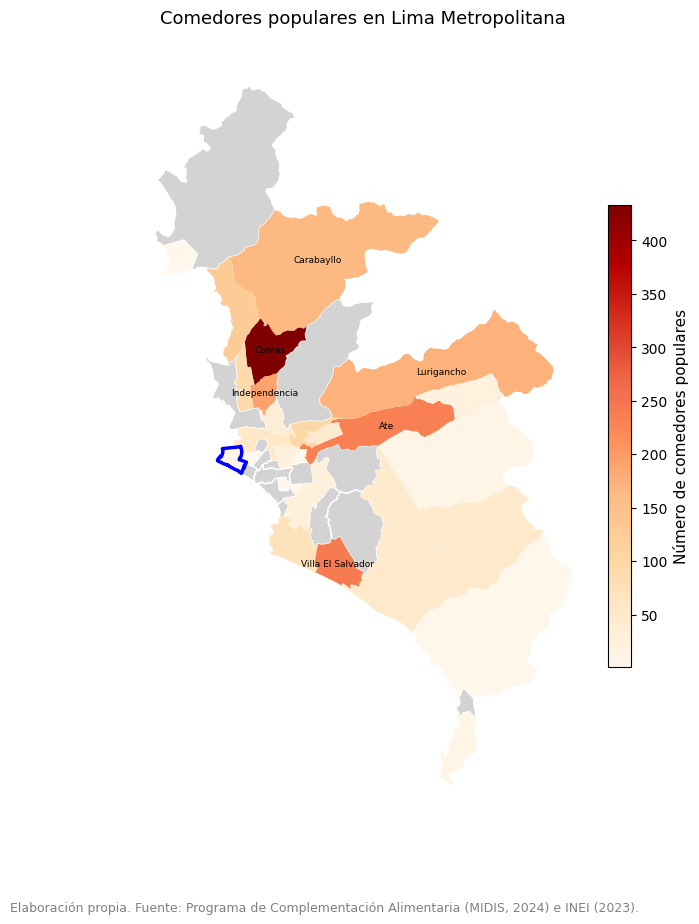

In [159]:
fig, ax = plt.subplots(figsize=(10, 10))

# Lima Metropolitana
gdf_lima.plot(ax=ax, color="lightgray", edgecolor="white")

# Distritos con comedores
gdf_lima[gdf_lima["Tiene_comedor"] == True].plot(
    ax=ax,
    column="N_comedores",
    cmap="OrRd",
    legend=True,
    legend_kwds={
        "label": "Número de comedores populares",
        "orientation": "vertical",
        "shrink": 0.6,
        "pad": 0.02
    }
)

# Resaltar San Miguel
gdf_lima[gdf_lima["DISTRITO"] == "SAN MIGUEL"].plot(
    ax=ax,
    color="none",
    edgecolor="blue",
    linewidth=2.5
)

#Nombre de los distritos que tienen > 150 comedores
for idx, row in gdf_lima[gdf_lima["N_comedores"] > 150].iterrows():
    # Calcular el centroide de cada distrito
    x, y = row["geometry"].centroid.coords[0]
    ax.text(x, y, row["DISTRITO"].title(),
            fontsize=6.5, color="black", ha="center", va="center")

# Título y pie de página
plt.title("Comedores populares en Lima Metropolitana",
          fontsize=13, pad=20)
plt.axis("off")

plt.figtext(
    0.5, 0.02,
    "Elaboración propia. Fuente: Programa de Complementación Alimentaria (MIDIS, 2024) e INEI (2023).",
    wrap=True, ha="center", fontsize=9, color="gray"
)

#Guardamos imagen yay
plt.savefig(
    r"C:\Users\santi\OneDrive\Desktop\Python\mapa_comedores_lima.png",
    dpi=300, bbox_inches="tight", facecolor="white"
)

plt.show()

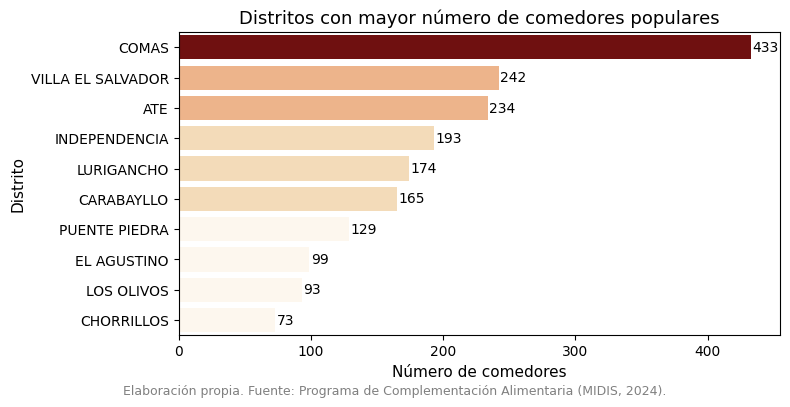

In [160]:
#Top 10
top = (
    gdf_lima[["DISTRITO", "N_comedores"]]
    .sort_values("N_comedores", ascending=False)
    .dropna()
    .head(10)
)

#Variable discreta
top["N_comedores"] = top["N_comedores"].astype(int)

#Colores
cmap = mpl.colormaps.get_cmap("OrRd")

# Crear bins según número de comedores
bins = np.linspace(top["N_comedores"].min(), top["N_comedores"].max(), n_colors + 1)
top = top.copy()
top["Grupo"] = pd.cut(top["N_comedores"], bins=bins, labels=False, include_lowest=True)
top["Color"] = top["Grupo"].apply(lambda x: colors_discretos[x])

# Graficar
plt.figure(figsize=(8, 4))
ax = sns.barplot(
    data=top,
    x="N_comedores",
    y="DISTRITO",
    hue="DISTRITO",
    dodge=False,
    palette=top.set_index("DISTRITO")["Color"].to_dict(),
    legend=False
)

# Añadir etiquetas numéricas
for i, v in enumerate(top["N_comedores"]):
    ax.text(v + 1, i, str(v), color="black", va="center")

plt.xlabel("Número de comedores")
plt.ylabel("Distrito")
plt.title("Distritos con mayor número de comedores populares")
plt.tight_layout()

plt.figtext(
    0.5, 0.001,
    "Elaboración propia. Fuente: Programa de Complementación Alimentaria (MIDIS, 2024).",
    wrap=True, ha="center", fontsize=9, color="gray")

plt.savefig(
    r"C:\Users\santi\OneDrive\Desktop\Python\grafico_barras_comedores.png",
    dpi=300, bbox_inches="tight", facecolor="white")
        
plt.show()